In [1]:
from IPython.display import display, Latex
import sympy
from sympy.core.symbol import symbols, Symbol
from sympy.printing import latex, pprint
from sympy import log, exp, oo, integrate, Function, lambdify, nsolve, Pow, S, Derivative
from sympy import simplify, collect, expand, factor, apart, cancel 
from sympy import solve, pi, sqrt, series
from sympy.solvers.ode import dsolve
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy.optimize import curve_fit, root_scalar, root
from math import pow

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
A = symbols('A')
eps = symbols('\epsilon')
d = symbols('d')
x = symbols('x')
#C = eps*A/(d + x)
C = eps*A/x
Cs = C.series(x, x0=d, n=5).removeO()
Cs

A*\epsilon/d - A*\epsilon*(-d + x)/d**2 + A*\epsilon*(-d + x)**2/d**3 - A*\epsilon*(-d + x)**3/d**4 + A*\epsilon*(-d + x)**4/d**5

In [12]:
dCsdx = Cs.diff(x)
dCsdx
expand(dCsdx)

-10*A*\epsilon/d**2 + 20*A*\epsilon*x/d**3 - 15*A*\epsilon*x**2/d**4 + 4*A*\epsilon*x**3/d**5

In [18]:
C0 = symbols('C_0')
ans = expand(dCsdx).subs({A*eps/d:C0})
ans

-10*C_0/d + 20*C_0*x/d**2 - 15*C_0*x**2/d**3 + 4*C_0*x**3/d**4

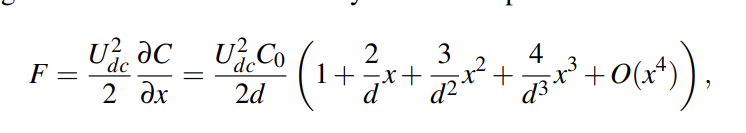

In [19]:
collect(ans,C0/d)

C_0*(-10 + 20*x/d - 15*x**2/d**2 + 4*x**3/d**3)/d

# define C to match the end result above:

In [36]:

# Define the symbols
x, d, A, epsilon, Vb = symbols('x d A epsilon V_b')
# Define the capacitance function
C = epsilon * A / (d - x)
# Perform the series expansion around x = 0
C_series = C.series(x, x0=0, n=6).removeO()
C_series

A*epsilon/d + A*epsilon*x/d**2 + A*epsilon*x**2/d**3 + A*epsilon*x**3/d**4 + A*epsilon*x**4/d**5 + A*epsilon*x**5/d**6

In [29]:
# Differentiate the series expansion with respect to x
dCdx = sympy.diff(C_series, x)
dCdx
C0 = symbols('C_0')
dCdx = dCdx.subs({A * epsilon/d: C0})
dCdx.simplify()

C_0*(d**4 + 2*d**3*x + 3*d**2*x**2 + 4*d*x**3 + 5*x**4)/d**5

In [37]:
F = collect(dCdx*Vb**2/2,C0/d)
F


C_0*V_b**2*(1 + 2*x/d + 3*x**2/d**2 + 4*x**3/d**3 + 5*x**4/d**4)/(2*d)

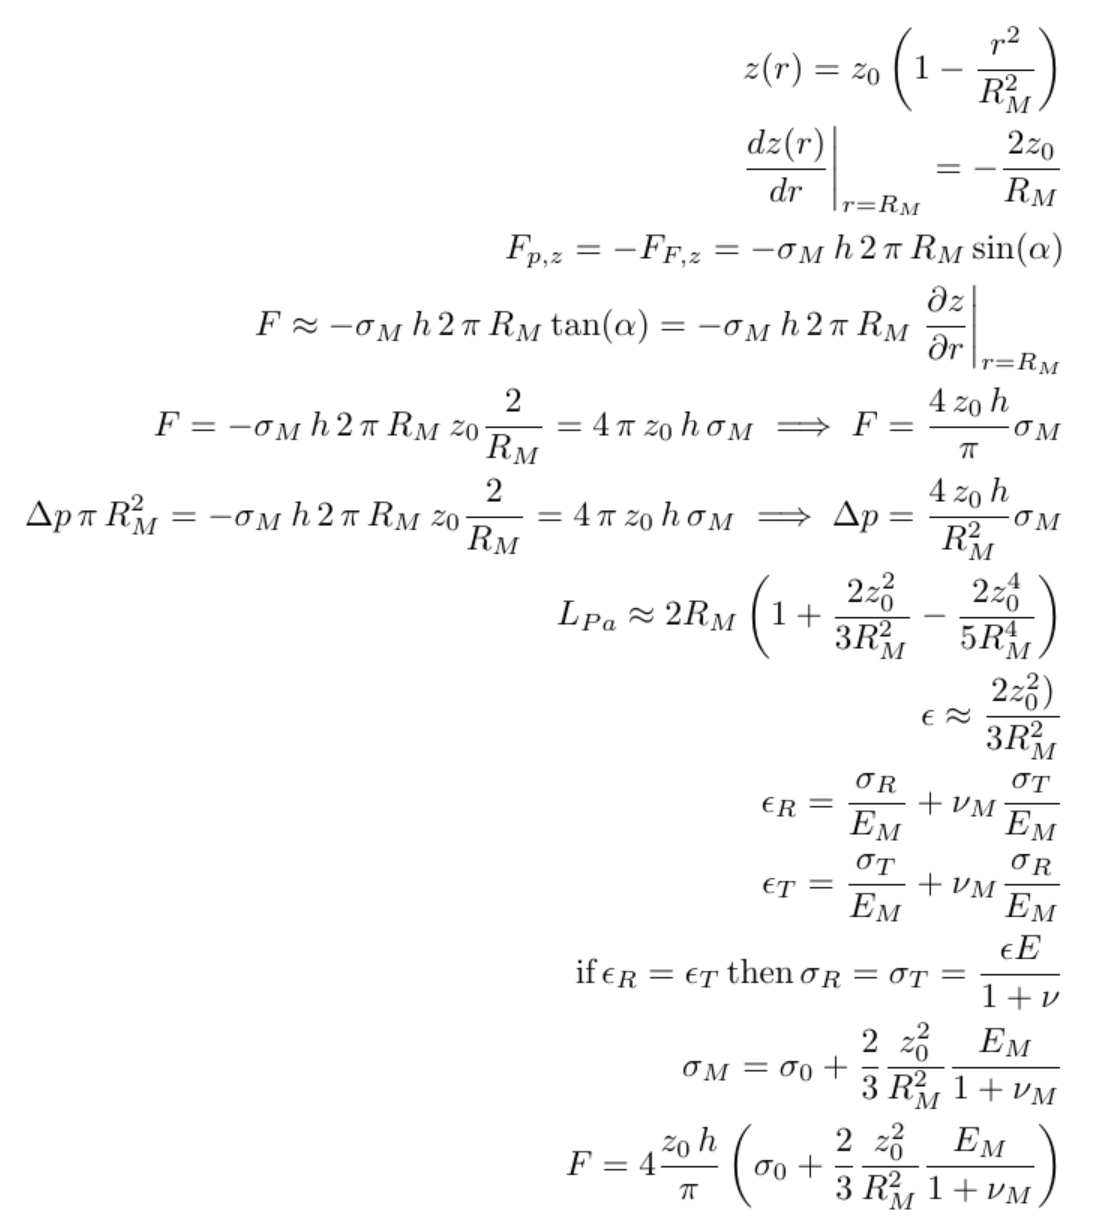

$c = \sqrt{S/\sigma}$ and I want a voltage to modulate $S$. I have $S$ as a function of $z_0$, the perturbation of the membrane. I also know capacitance and the force the voltage exerts on the membrane. I need $z_o$ as a function of voltage. $F=kx$. $k$ is the second derivative of stored energy.  